In [34]:
# Import các thư viện cần thiết

import pandas as pd
import numpy as np

# Import bộ dữ liệu
df = pd.read_csv('data/NASA Near-Earth Objects.csv', index_col=0)
df.index = range(1, len(df) + 1) 

# Xem qua dữ liệu bộ dữ liệu
df.head()

,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
1,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
2,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
3,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
4,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
5,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


### 4. Xác định vấn đề bài toán

#### 4.2. Loại bỏ các thuộc tính không liên quan đến vấn đề bài toán

Loại bỏ các thuộc tính không liên quan đến bài toán gồm:
* neo_reference_id (trùng lặp với id)
* name, name_limited, designation (đều chỉ để định danh NEO)
* orbit_id (chỉ để định danh quỹ đạo NEO).

In [35]:
df.drop(columns=['neo_reference_id', 'name_limited', 'orbit_id', 'name','designation' ], inplace=True)

### 5. Tiền xử lý dữ liệu

#### 5.1. Định dạng dữ liệu

Kiểm tra kiểu dữ liệu của các cột.

In [36]:
df.dtypes

id                                     int64
absolute_magnitude_h                 float64
is_potentially_hazardous_asteroid       bool
is_sentry_object                        bool
kilometers_estimated_diameter_min    float64
kilometers_estimated_diameter_max    float64
orbit_class_type                      object
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_date                object
last_observation_date                 object
orbit_class_description               object
dtype: object

Định dạng lại kiểu dữ liệu của 2 cột ngày tháng năm (first_observation_date và last_observation_date) từ object sang datetime, kiểu dữ liệu của biến phân loại orbit_class_type từ object sang category.

In [37]:
df['first_observation_date'] = pd.to_datetime(df['first_observation_date'], errors='coerce')
df['last_observation_date'] = pd.to_datetime(df['last_observation_date'], errors='coerce')

df['orbit_class_type'] = df['orbit_class_type'].astype('category')

In [38]:
df.dtypes

id                                            int64
absolute_magnitude_h                        float64
is_potentially_hazardous_asteroid              bool
is_sentry_object                               bool
kilometers_estimated_diameter_min           float64
kilometers_estimated_diameter_max           float64
orbit_class_type                           category
perihelion_distance                         float64
aphelion_distance                           float64
first_observation_date               datetime64[ns]
last_observation_date                datetime64[ns]
orbit_class_description                      object
dtype: object

#### 5.2. Tìm và xử lý giá trị bị khuyết

Ta tính số lượng giá trị khuyết theo từng thuộc tính.

In [39]:
df.isnull().sum()

id                                   0
absolute_magnitude_h                 8
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    8
kilometers_estimated_diameter_max    8
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               1
last_observation_date                0
orbit_class_description              0
dtype: int64

##### **Điền khuyết absolute_magnitude_h**

Ta xem các hàng dữ liệu chứa giá trị bị khuyết tại absolute_magnitude_h.

In [40]:
dataFrame_missingData_absolute_magnitude_h  = df[df['absolute_magnitude_h'].isnull()]
dataFrame_missingData_absolute_magnitude_h

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
7093,3592397,NaN,False,False,0.096506,0.215794,AMO,1.030625,1.833895,2010-01-12,2010-01-14,Near-Earth asteroid orbits similar to that of ...
7094,3529628,NaN,False,False,0.242412,0.542051,AMO,1.296142,1.585558,2010-01-14,2010-01-16,Near-Earth asteroid orbits similar to that of ...
7281,3593352,NaN,False,False,0.242412,0.542051,AMO,1.283669,2.252321,2010-04-11,2010-04-13,Near-Earth asteroid orbits similar to that of ...
7293,3593534,NaN,False,False,0.237988,0.532157,AMO,1.124254,1.633350,2010-04-19,2010-04-21,Near-Earth asteroid orbits similar to that of ...
7296,3593636,NaN,False,False,0.050647,0.113250,AMO,1.248248,1.606883,2010-04-28,2010-04-30,Near-Earth asteroid orbits similar to that of ...
7397,3594572,NaN,False,False,0.552783,1.236061,AMO,1.288272,1.780744,2010-06-17,2010-06-21,Near-Earth asteroid orbits similar to that of ...
7400,3536587,NaN,False,False,NaN,NaN,APO,0.809472,1.333837,2010-06-23,2010-06-25,Near-Earth asteroid orbits which cross the Ear...
7401,3536588,NaN,False,False,0.110295,0.246627,APO,0.587842,1.866107,2010-06-23,2010-06-24,Near-Earth asteroid orbits which cross the Ear...


Ta thấy hàng nào có absolute_magnitude_h bị khuyết thì có is_potentially_hazardous_asteroid = False.<br><br>
Vì vậy, ta tìm giá trị Mode đối với tập dữ liệu mà is_potentially_hazardous_asteroid = False.

In [41]:
# non_hazardous_values chứa các giá trị của cột 'absolute_magnitude_h' cùng các dòng
# có giá trị 'is_potentially_hazardous_asteroid' là False

non_hazardous_values = df[df['is_potentially_hazardous_asteroid'] == False]['absolute_magnitude_h']
print(non_hazardous_values.mode())

0    24.8
1    25.4
Name: absolute_magnitude_h, dtype: float64


Có 2 Mode, vì vậy ta chọn giá trị Mode nhỏ hơn để điền khuyết cột absolute_magnitude_h đồng thời tránh ảnh hưởng lớn tới phân bố giá trị của cột.

In [42]:
df['absolute_magnitude_h'] =df['absolute_magnitude_h'].fillna(non_hazardous_values.mode()[0])

Chúng ta kiểm tra lại xem cột absolute_magnitude_h đã được điền khuyết chưa.

In [43]:
df.isnull().sum()

id                                   0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    8
kilometers_estimated_diameter_max    8
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               1
last_observation_date                0
orbit_class_description              0
dtype: int64

##### **Điền khuyết kilometers_estimated_diameter_max và kilometers_estimated_diameter_min**

Ta xem các hàng dữ liệu chứa giá trị bị khuyết tại kilometers_estimated_diameter_max.

In [44]:
dataFrame_missingData_kilometers_estimated_diameter_max  = df[df['kilometers_estimated_diameter_max'].isnull()]
dataFrame_missingData_kilometers_estimated_diameter_max

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
7099,3486442,22.01,False,False,NaN,NaN,ATE,0.499066,1.308927,2010-01-19,2022-02-20,Near-Earth asteroid orbits similar to that of ...
7100,3486468,24.50,False,False,NaN,NaN,APO,0.992934,3.807938,2010-01-21,2010-02-19,Near-Earth asteroid orbits which cross the Ear...
7298,3521512,22.50,False,False,NaN,NaN,APO,0.972326,3.523808,2010-04-23,2010-05-16,Near-Earth asteroid orbits which cross the Ear...
7299,3520758,23.60,False,False,NaN,NaN,ATE,0.560438,1.041743,2010-04-20,2015-04-23,Near-Earth asteroid orbits similar to that of ...
7300,3519453,27.00,False,False,NaN,NaN,APO,0.859304,1.572154,2010-05-04,2010-05-08,Near-Earth asteroid orbits which cross the Ear...
7399,3536555,20.70,True,False,NaN,NaN,APO,0.807641,2.704371,2010-06-30,2020-01-29,Near-Earth asteroid orbits which cross the Ear...
7400,3536587,24.80,False,False,NaN,NaN,APO,0.809472,1.333837,2010-06-23,2010-06-25,Near-Earth asteroid orbits which cross the Ear...
7420,3537906,19.30,False,False,NaN,NaN,AMO,1.061093,4.500854,2010-07-21,2020-01-26,Near-Earth asteroid orbits similar to that of ...


Ta thấy rằng, những hàng có cột kilometers_estimated_diameter_max bị khuyết thì cũng có cột kilometers_estimated_diameter_min bị khuyết.

**Phương pháp điền khuyết:**<br>
* Xem xét độ tương quan giữa hai cột kilometers_estimated_diameter_min và kilometers_estimated_diameter_max, nếu có tương quan ta chỉ cần điền một cột, cột còn lại sẽ được tính toán từ cột đã điền.
* Xem xét độ tương quan giữa cột kilometers_estimated_diameter_min với cột absolute_magnitude_h, nếu có tương quan ta sẽ điền cột kilometers_estimated_diameter_min từ cột absolute_magnitude_h.

Ta sẽ tính mức độ tương quan bằng hệ số tương quan Pearson.

Tương quan Pearson giữa kilometers_estimated_diameter_max và kilometers_estimated_diameter_min: 0.9999999999999992


<Axes: xlabel='kilometers_estimated_diameter_max', ylabel='kilometers_estimated_diameter_min'>

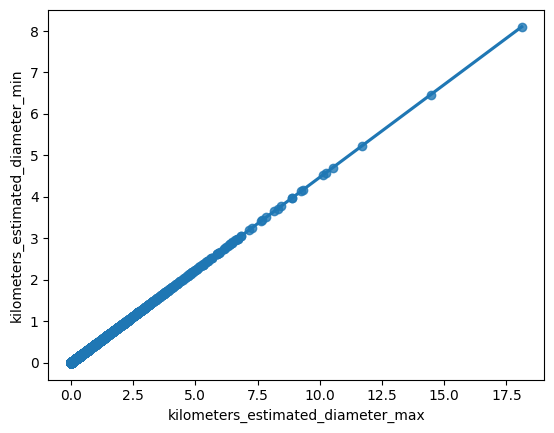

In [45]:
import seaborn as sns

# Tính hệ số tương quan giữa 'kilometers_estimated_diameter_max' và 'kilometers_estimated_diameter_min'
# dựa vào hệ số tương quan Pearson

correlation = df['kilometers_estimated_diameter_max'].corr(df['kilometers_estimated_diameter_min'],method='pearson')
print('Tương quan Pearson giữa kilometers_estimated_diameter_max và kilometers_estimated_diameter_min:', correlation)

# Trực quan hóa mối quan hệ giữa 'kilometers_estimated_diameter_max' và 'kilometers_estimated_diameter_min'
sns.regplot(x='kilometers_estimated_diameter_max', y='kilometers_estimated_diameter_min', data=df)

Hệ số tương quan của hai cột là 0.9999999999999992 (độ tương quan gần như tuyệt đối). Các điểm dữ liệu đều tập trung trên đường thẳng dự đoán.<br><br>
Vì thế, ta cần tìm ra quy luật để điền khuyết cột này dựa trên cột còn lại.

Ta sẽ dùng mô hình hồi quy tuyến tính để kiểm tra việc điền khuyết cho cột kilometers_estimated_diameter_max từ cột kilometers_estimated_diameter_min có hiệu quả hay không.

In [46]:
# tạo mô hình hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_reg_test = df.dropna(subset=['kilometers_estimated_diameter_max'])
X = df_reg_test[['kilometers_estimated_diameter_min']]
y = df_reg_test['kilometers_estimated_diameter_max']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
print('Mean squared error test:', mean_squared_error(y_test, y_pred))
print('Mean squared error train:', mean_squared_error(y_train, model_linear.predict(X_train)))
print('Score:', model_linear.score(X_test, y_test))

Mean squared error test: 5.079060756600633e-21
Mean squared error train: 5.108182683238987e-21
Score: 1.0


Từ kết quả, ta thấy mô hình hồi quy tuyến tính để dự đoán cột kilometers_estimated_diameter_max dựa trên cột kilometers_estimated_diameter_min hoạt động hiệu quả.

Tiếp theo, ta sẽ tìm cách điền khuyết cột kilometers_estimated_diameter_min từ cột absolute_magnitude_h. Trước hết, ta cần phải tính độ tương quan giữa hai cột này với nhau. Ta sẽ tính bằng hệ số tương quan Pearson.

Tương quan Pearson giữa kilometers_estimated_diameter_min và absolute_magnitude_h: -0.7153089006656862


<Axes: xlabel='kilometers_estimated_diameter_min', ylabel='absolute_magnitude_h'>

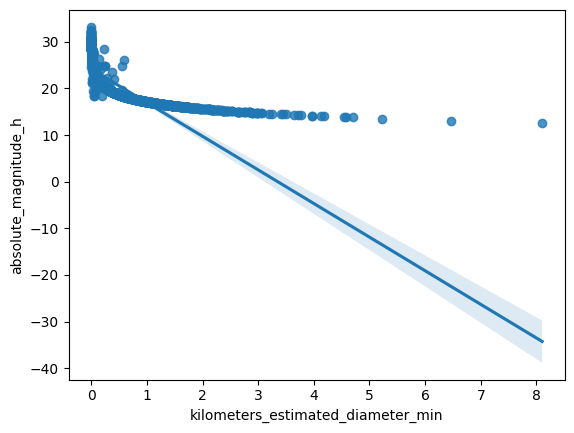

In [47]:
# Xem xét độ tương quan giữa cột kilometers_estimated_diameter_min với cột absolute_magnitude_h
# nếu có tương quan, ta sẽ điền cột kilometers_estimated_diameter_min từ cột absolute_magnitude_h

correlation = df['kilometers_estimated_diameter_min'].corr(df['absolute_magnitude_h'],method='pearson')
print('Tương quan Pearson giữa kilometers_estimated_diameter_min và absolute_magnitude_h:', correlation)
sns.regplot(x='kilometers_estimated_diameter_min', y='absolute_magnitude_h', data=df)

Hệ số tương quan (-0.7153089) cho thấy có độ tương quan cao và nghịch biến giữa hai cột, nhưng độ tương quan đó lại phi tuyến tính. Vì vậy, việc điền khuyết cột kilometers_estimated_diameter_min dựa trên cột absolute_magnitude_h là điều khả thi.<br><br>

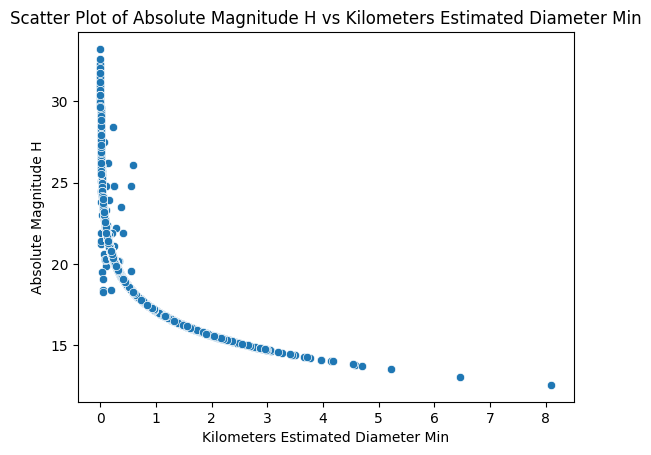

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trực quan hóa mối quan hệ giữa 'kilometers_estimated_diameter_min' và 'absolute_magnitude_h'

sns.scatterplot(x='kilometers_estimated_diameter_min', y='absolute_magnitude_h', data=df)
plt.xlabel('Kilometers Estimated Diameter Min')
plt.ylabel('Absolute Magnitude H')
plt.title('Scatter Plot of Absolute Magnitude H vs Kilometers Estimated Diameter Min')
plt.show()

Dựa vào đồ thị, ta thấy các điểm dữ liệu phân bố có quy luật đường hyperbol: y = (ax + b) / (cx + d)<br><br>
Ta dùng mô hình hồi quy phân thức để điền khuyết kilometers_estimated_diameter_min dựa trên absolute_magnitude_h.

Tham số ước lượng: a=-441.36129472952666, b=10980.991622015155, c=756.9961375432638, d=-9045.160097802367
Mean Squared Error (MSE): 0.008408403731414547
R^2 (Train): 0.9020519896761967


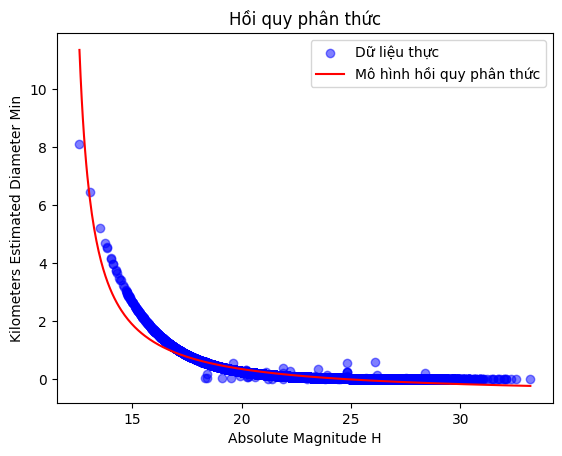

In [49]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

df_hyperbol_test = df.dropna(subset=['kilometers_estimated_diameter_min', 'absolute_magnitude_h'])
absolute_magnitude_h = df_hyperbol_test['absolute_magnitude_h']
kilometers_estimated_diameter_min = df_hyperbol_test['kilometers_estimated_diameter_min']

# Định nghĩa mô hình hồi quy phân thức
def fractional_model(x, a, b, c, d):
    return (a * x + b) / (c * x + d)

# Fit mô hình với dữ liệu
params, covariance = curve_fit(fractional_model, absolute_magnitude_h, kilometers_estimated_diameter_min)
a, b, c, d = params
print(f"Tham số ước lượng: a={a}, b={b}, c={c}, d={d}")

# Dự đoán giá trị
x_line = np.linspace(min(absolute_magnitude_h), max(absolute_magnitude_h), 400)
y_pred = fractional_model(x_line, a, b, c, d)

# Tính MSE (Mean Squared Error)
y_train_pred = fractional_model(absolute_magnitude_h, a, b, c, d)
mse = mean_squared_error(kilometers_estimated_diameter_min, y_train_pred)
print(f"Mean Squared Error (MSE): {mse}")
R2 = 1 - (np.sum((kilometers_estimated_diameter_min - y_train_pred) ** 2) / np.sum((kilometers_estimated_diameter_min - np.mean(kilometers_estimated_diameter_min)) ** 2))
print(f"R^2 (Train): {R2}")

# Vẽ biểu đồ
plt.scatter(absolute_magnitude_h, kilometers_estimated_diameter_min, label='Dữ liệu thực', color='blue', alpha=0.5)
plt.plot(x_line, y_pred, label='Mô hình hồi quy phân thức', color='red')
plt.xlabel('Absolute Magnitude H')
plt.ylabel('Kilometers Estimated Diameter Min')
plt.title('Hồi quy phân thức')
plt.legend()
plt.show()

In [50]:
print(f"Giá trị thử: {df['absolute_magnitude_h'][2000]}")
print(f"Giá trị dự đoán: {fractional_model(df['absolute_magnitude_h'][2000], a, b, c, d)}")
print(f"Giá trị thực tế: {df['kilometers_estimated_diameter_min'][2000]}")

Giá trị thử: 19.57
Giá trị dự đoán: 0.4062138634631001
Giá trị thực tế: 0.3240074354


Ta thấy giá trị mô hình hồi quy phân thức dự đoán khá gần so với giá trị thực tế, vì thế mô hình này có thể sử dụng để điền khuyết kilometers_estimated_diameter_min dựa trên absolute_magnitude_h.

In [51]:
# Tìm các dòng có giá trị 'kilometers_estimated_diameter_min' bị thiếu
missing_indices = df[df['kilometers_estimated_diameter_min'].isnull()].index

# Dự đoán các giá trị bị thiếu
predicted_values = fractional_model(df['absolute_magnitude_h'][missing_indices], a, b, c, d)

# Điền khuyết bằng các giá trị dự đoán
df.loc[missing_indices, 'kilometers_estimated_diameter_min'] = predicted_values

# Kiểm tra lại số lượng giá trị bị thiếu của cột 'kilometers_estimated_diameter_min'
kilo_min_null = df['kilometers_estimated_diameter_min'].isnull().sum()
print(f"Số lượng giá trị bị thiếu của cột 'kilometers_estimated_diameter_min': {kilo_min_null}")

Số lượng giá trị bị thiếu của cột 'kilometers_estimated_diameter_min': 0


Ta kiểm tra xem trong kilometers_estimated_diameter_min có giá trị dự đoán điền khuyết là âm không.

In [52]:
df[df['kilometers_estimated_diameter_min'] < 0]

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
7300,3519453,27.0,False,False,-0.08213,NaN,APO,0.859304,1.572154,2010-05-04,2010-05-08,Near-Earth asteroid orbits which cross the Ear...


Có 1 giá trị bị âm. Ta cần phải xử lý giá trị này do giá trị đường kính ước tính không thể là giá trị âm.<br><br>
Ta nhận định rằng giá trị dự đoán này có nghĩa rằng vật thể này có đường kính ước tính tối thiểu cực nhỏ. Thêm vào đó, NEO này là NEO không nguy hiểm.<br><br>
Vì vậy, ta loại bỏ hàng chứa giá trị này, do điều này sẽ không ảnh hưởng nhiều đến dữ liệu.

In [53]:
# Drop hàng nào có giá trị âm
df.drop(df[df['kilometers_estimated_diameter_min']<0].index, inplace=True)

Ta dùng mô hình hồi quy tuyến tính để dự đoán cột kilometers_estimated_diameter_max dựa trên cột kilometers_estimated_diameter_min hoạt động hiệu quả.

In [54]:
# Dự đoán cột kiometers_estimated_diameter_max dựa trên cột kilometers_estimated_diameter_min
# bằng cách dùng mô hình khi nãy đã dự đoán

# Tìm các dòng có giá trị 'kilometers_estimated_diameter_max' bị thiếu
missing_indices = df[df['kilometers_estimated_diameter_max'].isnull()].index

# Dự đoán các giá trị bị thiếu
predicted_values = model_linear.predict(df['kilometers_estimated_diameter_min'][missing_indices].values.reshape(-1, 1))

# Điền khuyết bằng các giá trị dự đoán
df.loc[missing_indices, 'kilometers_estimated_diameter_max'] = predicted_values

# Kiểm tra điền khuyết thành công chưa
kilo_null_check = df['kilometers_estimated_diameter_max'].isnull().sum()
print(f"Số lượng giá trị bị thiếu của cột 'kilometers_estimated_diameter_max': {kilo_null_check}")

Số lượng giá trị bị thiếu của cột 'kilometers_estimated_diameter_max': 0


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Sau khi điền khuyết xong ta kiểm tra lại dữ liệu.

In [55]:
df.isnull().sum()

id                                   0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               1
last_observation_date                0
orbit_class_description              0
dtype: int64

##### **Điền khuyết first_observation_date**

Ta xem thông tin của hàng dữ liệu khuyết first_observation_date

In [56]:
df[df['first_observation_date'].isnull()]

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
20703,3843794,20.6,False,False,0.20163,0.450858,AMO,1.077174,1.865083,NaT,2019-09-06,Near-Earth asteroid orbits similar to that of ...


Chúng ta kiểm tra các giá trị first_observation_date của các hàng kề cạnh hàng chứa dữ liệu khuyết.

In [57]:
# Kiểm tra thông tin các giá trị xung quanh giá trị bị thiếu
null_index = df[df['first_observation_date'].isnull()].index[0]
neighboring_values = df['first_observation_date'].iloc[null_index-5:null_index+6]
print(neighboring_values)

20700   2017-08-16
20701   2019-09-04
20702   2019-09-05
20703          NaT
20704   2019-09-05
20705   2019-09-06
20706   2019-09-05
20707   2019-09-06
20708   2019-09-05
20709   2019-09-06
20710   2019-09-06
Name: first_observation_date, dtype: datetime64[ns]


Từ kết quả, ta có thể dự đoán rằng các hàng dữ liệu kề nhau sẽ có cùng một khoảng first_observation_date giống nhau. Vì thế, ta điền khuyết dữ liệu khuyết này bằng dữ liệu first_observation_date của hàng kề trên.

In [58]:
null_index = df[df['first_observation_date'].isnull()].index[0]
df.loc[null_index, 'first_observation_date'] = df.loc[null_index - 1, 'first_observation_date']

In [59]:
df.loc[null_index]

id                                                                             3843794
absolute_magnitude_h                                                              20.6
is_potentially_hazardous_asteroid                                                False
is_sentry_object                                                                 False
kilometers_estimated_diameter_min                                              0.20163
kilometers_estimated_diameter_max                                             0.450858
orbit_class_type                                                                   AMO
perihelion_distance                                                           1.077174
aphelion_distance                                                             1.865083
first_observation_date                                             2019-09-05 00:00:00
last_observation_date                                              2019-09-06 00:00:00
orbit_class_description              Near-E

In [60]:
df.isnull().sum()

id                                   0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               0
last_observation_date                0
orbit_class_description              0
dtype: int64

### 6. Phân tích thăm dò dữ liệu và thực hiện kỹ thuật đặc trưng

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 1 to 24000
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 23999 non-null  int64         
 1   absolute_magnitude_h               23999 non-null  float64       
 2   is_potentially_hazardous_asteroid  23999 non-null  bool          
 3   is_sentry_object                   23999 non-null  bool          
 4   kilometers_estimated_diameter_min  23999 non-null  float64       
 5   kilometers_estimated_diameter_max  23999 non-null  float64       
 6   orbit_class_type                   23999 non-null  category      
 7   perihelion_distance                23999 non-null  float64       
 8   aphelion_distance                  23999 non-null  float64       
 9   first_observation_date             23999 non-null  datetime64[ns]
 10  last_observation_date              2399

#### **Các biến phân loại**

##### **is_potentially_hazardous_asteroid**

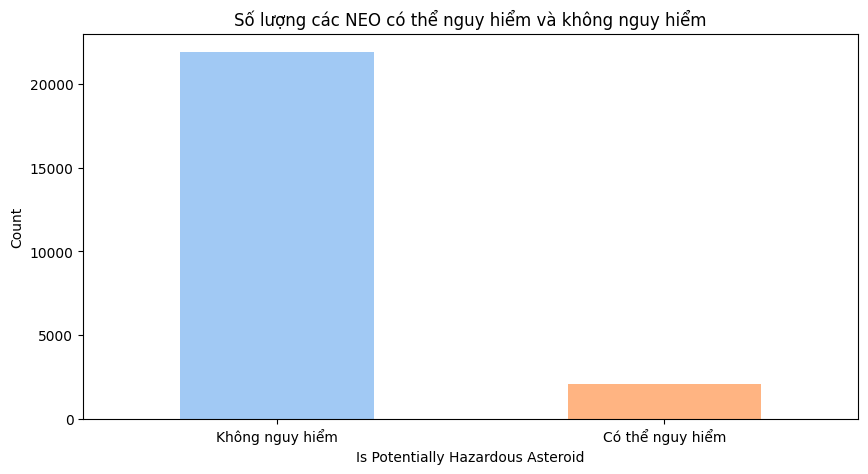

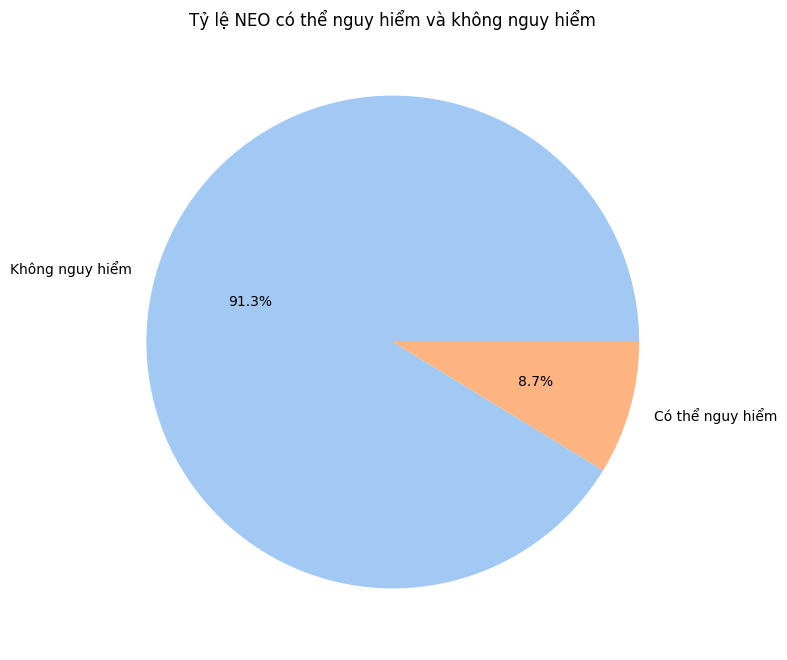

In [68]:
# Trực quan hóa dữ liệu is_potentially_hazardous_asteroid
color = sns.color_palette("pastel")
hazardous_counts = df['is_potentially_hazardous_asteroid'].value_counts()

plt.figure(figsize=(10, 5))
hazardous_counts.plot(kind='bar', color=color)
plt.title('Số lượng các NEO có thể nguy hiểm và không nguy hiểm')
plt.xlabel('Is Potentially Hazardous Asteroid')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Không nguy hiểm', 'Có thể nguy hiểm'], rotation=0)
plt.show()

plt.figure(figsize=(8, 8))
hazardous_counts.plot(kind='pie', autopct='%1.1f%%', colors=color, labels=['Không nguy hiểm', 'Có thể nguy hiểm'])
plt.title('Tỷ lệ NEO có thể nguy hiểm và không nguy hiểm')
plt.ylabel('')
plt.show()

##### **is_sentry_object**

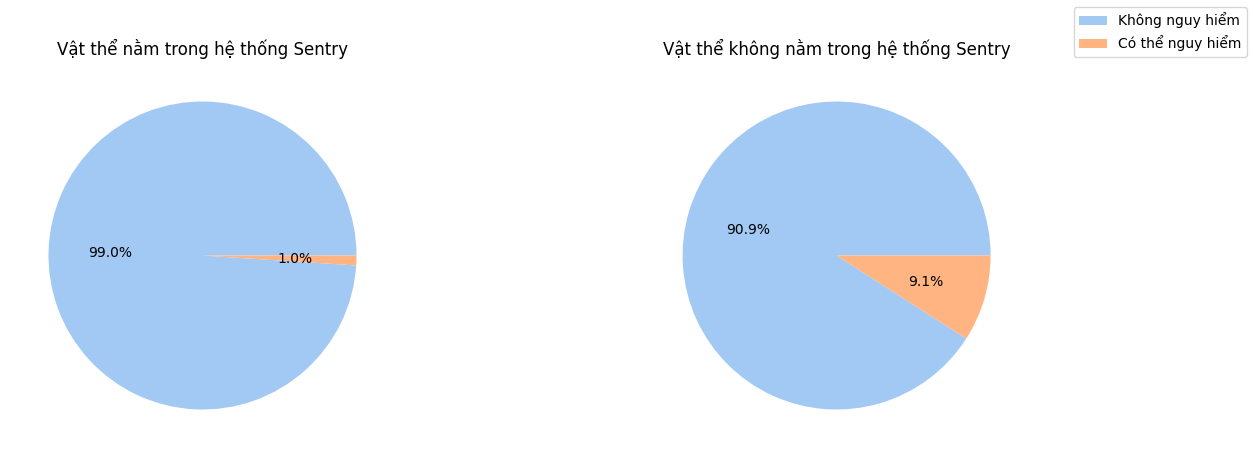

In [64]:
color = sns.color_palette("pastel")
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Các vật thể nằm trong hệ thống Sentry
df1 = df[df['is_sentry_object'] == True]
axs[0].pie(df1['is_potentially_hazardous_asteroid'].value_counts(), autopct='%1.1f%%', colors=color)
axs[0].set_title('Vật thể nằm trong hệ thống Sentry')

# Các vật thể không nằm trong hệ thống Sentry
df2 = df[df['is_sentry_object'] == False]
axs[1].pie(df2['is_potentially_hazardous_asteroid'].value_counts(), autopct='%1.1f%%', colors=color)
axs[1].set_title('Vật thể không nằm trong hệ thống Sentry')


fig.legend(['Không nguy hiểm', 'Có thể nguy hiểm'], loc='upper right')

plt.show()


**Đánh giá biến is_potentially_hazardous_asteroid:**
* Tỉ lệ NEO có thể nguy hiểm chiếm 91.3&, tỉ lệ NEO có thể nguy hiểm chiếm 8.7%.

=> Dữ liệu bị mất cân bằng

**Đánh giá biến orbit_class_type:**
* Tỉ lệ NEO có thể nguy hiểm trong mỗi loại quỹ đạo là khác nhau.
* Loại quỹ đạo IEO có tỉ lệ NEO có thể nguy hiểm cao nhất, loại quỹ đạo AMO có tỉ lệ NEO có thể nguy hiểm thấp nhất.

=> Biến này ảnh hưởng đến biến is_potentially_hazardous_asteroid<br><br>
**Đánh giá biến is_sentry_object:**
* Đối với các vật thể không nằm trong hệ theo dõi sentry thì có 9,1% là NEO có thể nguy hiểm.
* Đỏi với các vật thể nằm trong hệ theo dõi sentry thì có 1% là NEO có thể nguy hiểm.